<a href="https://colab.research.google.com/github/fabianobriao/Data_Scrubbing/blob/main/datascrubbing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza de dados do arquivo Titanic

# Etapa 1. Renomeação de colunas

In [3]:
import pandas as pd
import numpy as np

In [102]:
## importe d arquivo csv
file = "/content/drive/MyDrive/Colab Notebooks/Data_Scrubbing/1+-+Dados+Titanic.csv"
df = pd.read_csv(file)
print(df.head(5))
df.shape 
df.columns.values.tolist()
df = df.rename(columns={'SibSp': 'FamilyParents', 'Parch': 'NumberofParentesChildren'})
df.columns.values.tolist()

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...     7.25   NaN         S
1            2         1       1  ...  712.833   C85         C
2            3         1       3  ...    7.925   NaN         S
3            4         1       1  ...     53.1  C123         S
4            5         0       3  ...     8.05   NaN         S

[5 rows x 12 columns]


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'FamilyParents',
 'NumberofParentesChildren',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

# Etapa 2, Renomeação, ajeitar os tipos das colunas e alguns dados

In [103]:
# Informações sobre as colunas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               891 non-null    int64  
 1   Survived                  891 non-null    int64  
 2   Pclass                    891 non-null    int64  
 3   Name                      891 non-null    object 
 4   Sex                       891 non-null    object 
 5   Age                       714 non-null    float64
 6   FamilyParents             891 non-null    int64  
 7   NumberofParentesChildren  891 non-null    int64  
 8   Ticket                    891 non-null    object 
 9   Fare                      891 non-null    object 
 10  Cabin                     204 non-null    object 
 11  Embarked                  889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [104]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


Modificando **Survived** de inteiro para string, e alterando 1 para sim e 0 para não

In [105]:
df.loc[df["Survived"] == 1,"Survived"] = "Sim"
df.loc[df["Survived"] == 0,"Survived"] = "Não"
#df.info()
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked
0,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


# Etapa 3. Limpeza de Null, números ausentes

In [7]:
# Número total de valores ausentes:
df.isnull().sum().sum()

866

In [106]:
# Contagem de dados não nulos
print(df.count())

PassengerId                 891
Survived                    891
Pclass                      891
Name                        891
Sex                         891
Age                         714
FamilyParents               891
NumberofParentesChildren    891
Ticket                      891
Fare                        891
Cabin                       204
Embarked                    889
dtype: int64


In [107]:
# isna
#print(df.isna().sum())
# isnull dados ausentes
print(df.isnull().sum())
df.shape 

PassengerId                   0
Survived                      0
Pclass                        0
Name                          0
Sex                           0
Age                         177
FamilyParents                 0
NumberofParentesChildren      0
Ticket                        0
Fare                          0
Cabin                       687
Embarked                      2
dtype: int64


(891, 12)

Embarked
C    168
Q     77
S    644
dtype: int64

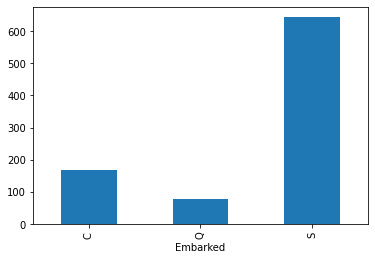

In [108]:
df['Embarked']
grupo1 = df.groupby(["Embarked"]).size()
grupo1.plot.bar()
grupo1 

In [109]:
#podemos substituir pela moda S
#df['Embarked'].fillna("S", inplace=True)
# podemos excluir linhas que contém esses dados ausentes
df.dropna(subset = ["Embarked"], inplace=True)
# podemos converter os  dados ausentes em NaN, que é um dado do tipo float '''
#df['Embarked'].fillna("NaN", inplace=True)
#print(df.isnull().sum())
df.shape 

(889, 12)

# Etapa 4, Criar campos calculados

In [11]:
# Criando um coluna que determina se é uma pessoa maior que 18 anos(adult), menor(child)
#df['Chil.Adult']=1
# Em coluna específica específico
df.insert(0, 'Child.Adult', 4, allow_duplicates=False)
#df['Chil.Adult'] = df.loc[df['Age'] < 18, 'Age'] = 'Child'
df['Child.Adult'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')
df.head(3) 

,Child.Adult,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked
0,Adult,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,Adult,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,Adult,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


In [111]:
#coluna para determinar se a pessoa é uma mãe(Mother) ou não(Not a Mother)
df.insert(0, 'Mother', 4, allow_duplicates=False)
df['Mother'] =   np.where((df['Sex'] == "female") & (df['Age'] > 18) & (df['NumberofParentesChildren'] > 0 ),
   'Mother', 'Not a Mother')
df.head(3)  

,Mother,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked
0,Not a Mother,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,Not a Mother,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,Not a Mother,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


In [114]:
df.groupby(["Mother"]).size()

Mother
Mother           64
Not a Mother    825
dtype: int64

# Etapa 5, Organizar títulos, nomes e sobrenomes(Brião, Mr Fabiano dos Santos) -> Mr | Fabiano dos Santos | Brião

In [15]:
# Primeiro separar pela vírgula, nesse exemplo isolar o sobrenome
# criando da coluna do sobrenome
df.insert(0, 'FamilyName', 4, allow_duplicates=False)
df['FamilyName'] = df['Name'].apply(lambda values: values.split(',')[0])
df.head(3)

,FamilyName,Mother,Child.Adult,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked
0,Braund,Not a Mother,Adult,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,Cumings,Not a Mother,Adult,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,Heikkinen,Not a Mother,Adult,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


In [115]:
# Segundo, separar o título do resto do nome
# criando a coluno do título, sr, sra, ms, lady, ...
# df.insert(0, 'Title', 4, allow_duplicates=False)
df['Title'] = df['Name'].apply(lambda values: values.split(' ')[1])
df.head(3)

,Mother,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked,Title
0,Not a Mother,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr.
1,Not a Mother,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C,Mrs.
2,Not a Mother,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,Miss.


In [116]:
# Terceiro, criando a coluna do primeiro nome e nome do meio
df.insert(0, 'FirstName', 4, allow_duplicates=False)
import re
L = []
for i in df['Name']:
    nome = i
    nome = (re.split("[;,] ", nome)[1])
    nome = (re.split(" ", nome)[1:])
    nome = ( ' '.join(nome) )
    L.append(nome)
    print(nome)

df["FirstName"] = L
df.head(3)

Owen Harris
John Bradley (Florence Briggs Thayer)
Laina
Jacques Heath (Lily May Peel)
William Henry
James
Timothy J
Gosta Leonard
Oscar W (Elisabeth Vilhelmina Berg)
Nicholas (Adele Achem)
Marguerite Rut
Elizabeth
William Henry
Anders Johan
Hulda Amanda Adolfina
(Mary D Kingcome) 
Eugene
Charles Eugene
Julius (Emelia Maria Vandemoortele)
Fatima
Joseph J
Lawrence
Anna "Annie"
William Thompson
Torborg Danira
Carl Oscar (Selma Augusta Emilia Johansson)
Farred Chehab
Charles Alexander
Ellen "Nellie"
Lalio
Manuel E
William Augustus (Marie Eugenie)
Mary Agatha
Edward H
Edgar Joseph
Alexander Oskar
Hanna
Ernest Charles
Augusta Maria
Jamila
Johan (Johanna Persdotter Larsson)
William John Robert (Dorothy Ann Wonnacott)
Theodor
Simonne Marie Anne Andree
Margaret Delia
William John
Denis
Bridget
Youssef
Josef (Josefine Franchi)
Juha Niilo
Richard Cater
Henry Sleeper (Myna Haxtun)
Lizzie (Elizabeth Anne Wilkinson)
Engelhart Cornelius
Hugh
Emily
Mansouer
Constance Mirium
William Frederick
Orsen
Hen

,FirstName,Mother,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked,Title
0,Owen Harris,Not a Mother,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr.
1,John Bradley (Florence Briggs Thayer),Not a Mother,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C,Mrs.
2,Laina,Not a Mother,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,Miss.


# Etapa 4, remover caracteres especiais e pontuações dos campos dos nomes

In [73]:
import re
import string 

# Título
L = []
for i in df1['Title']:
    nome = i
    nome = nome.translate(str.maketrans('', '', string.punctuation))
    L.append(nome)
df["Title"] = L

# primeiro nome e nome do meio
L = []
for i in df1['FirstName']:
    nome = i
    nome = nome.translate(str.maketrans('', '', string.punctuation))
    L.append(nome)
df["FirstName"] = L

# sobrenome
L = []
for i in df1['FamilyName']:
    nome = i
    nome = nome.translate(str.maketrans('', '', string.punctuation))
    L.append(nome)
df["FamilyName"] = L

df.head(3)

,Title,FirstName,FamilyName,Mother,Child.Adult,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked,title
0,Mr,Owen Harris,Braund,Not a Mother,Adult,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr
1,Mrs,John Bradley Florence Briggs Thayer,Cumings,Not a Mother,Adult,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C,Mrs
2,Miss,Laina,Heikkinen,Not a Mother,Adult,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,Miss


In [117]:
df1= df
# Terceiro, criando a coluna do primeiro nome e nome do meio
import re
import string 
L = []
for i in df1['FirstName']:
    nome = i
    nome = nome.translate(str.maketrans('', '', string.punctuation))
    L.append(nome)

df1["FirstName"] = L
df1.head(3)

,FirstName,Mother,PassengerId,Survived,Pclass,Name,Sex,Age,FamilyParents,NumberofParentesChildren,Ticket,Fare,Cabin,Embarked,Title
0,Owen Harris,Not a Mother,1,Não,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr.
1,John Bradley Florence Briggs Thayer,Not a Mother,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C,Mrs.
2,Laina,Not a Mother,3,Sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,Miss.


# Etapa 5, Agrupamento de dados, reconhecimento de dados semelhantes.

In [118]:
# primeiro, revisar os dados ausentes, nulos, ...
print(df["Title"].isnull().sum())
# analisar as entradas
grupo1 = df.groupby(["Title"]).size()
#print(grupo1)
# iremos agrupa
#Miss com Ms, deixando Miss
df.loc[df["Title"] == "Ms", "Title"] = "Miss"
#Master e Dr para Mr
df.loc[df["Title"].isin(["Master", "Dr"]), "Title"] = "Mr"
grupo1 = df.groupby(["Title"]).size()
grupo1

0


Title
Billiard,         1
Capt.             1
Carlo,            1
Col.              2
Cruyssen,         1
Don.              1
Dr.               7
Gordon,           2
Impe,             3
Jonkheer.         1
Major.            2
Master.          40
Melkebeke,        1
Messemaeker,      1
Miss.           178
Mlle.             2
Mme.              1
Mr.             502
Mrs.            120
Ms.               1
Mulder,           1
Pelsmaeker,       1
Planke,           3
Rev.              6
Shawah,           1
Steen,            1
Velde,            1
Walle,            1
der               1
the               1
y                 4
dtype: int64

In [120]:
print(df["Title"].isnull().sum())
# analisar as entradas
grupo1 = df.groupby(["Title"]).size()
grupo1

0


Title
Billiard,         1
Capt.             1
Carlo,            1
Col.              2
Cruyssen,         1
Don.              1
Dr.               7
Gordon,           2
Impe,             3
Jonkheer.         1
Major.            2
Master.          40
Melkebeke,        1
Messemaeker,      1
Miss.           178
Mlle.             2
Mme.              1
Mr.             502
Mrs.            120
Ms.               1
Mulder,           1
Pelsmaeker,       1
Planke,           3
Rev.              6
Shawah,           1
Steen,            1
Velde,            1
Walle,            1
der               1
the               1
y                 4
dtype: int64